# Decision tree example

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [2]:
from sklearn import __version__ as sklearn_v
from matplotlib import __version__ as plt_v
print(f"sklearn: {sklearn_v}")
print(f"matplotlib: {plt_v}")

sklearn: 1.4.1.post1
matplotlib: 3.8.3


In [3]:
# Create a balanced random dataset
X, y = make_classification(n_samples=1000, 
                           n_features=10, 
                           n_classes=2, 
                           weights=[0.5, 0.5], 
                           random_state=2024)

In [4]:
# Division into training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2024)

### Model on defulat parameters

In [5]:
# default model
model = DecisionTreeClassifier(random_state=2024)

model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 2024,
 'splitter': 'best'}

In [6]:
# training model
model.fit(X_train, y_train)

# calculating AUC on test data
y_pred_proba = model.predict_proba(X_test)[:, 1]
auc = round(roc_auc_score(y_test, y_pred_proba),3)
print(f"max_depth={model.tree_.max_depth}; AUC: {auc}")

max_depth=8; AUC: 0.942


### Loop for max depth

In [7]:
def decision_tree_calc(max_depth=None):
    model = DecisionTreeClassifier(random_state=2024, 
                                   max_depth=max_depth)
    model.fit(X_train, y_train)
    

    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc = round(roc_auc_score(y_test, y_pred_proba),3)
    print(f"max_depth={model.tree_.max_depth}; AUC: {auc}")
    
    return auc, model

depth_dict = {}

for max_depth in range(1, 11):
    auc, model = decision_tree_calc(max_depth=max_depth)
    depth_dict[max_depth] = auc

max_depth=1; AUC: 0.884
max_depth=2; AUC: 0.96
max_depth=3; AUC: 0.955
max_depth=4; AUC: 0.963
max_depth=5; AUC: 0.914
max_depth=6; AUC: 0.928
max_depth=7; AUC: 0.935
max_depth=8; AUC: 0.942
max_depth=8; AUC: 0.942
max_depth=8; AUC: 0.942


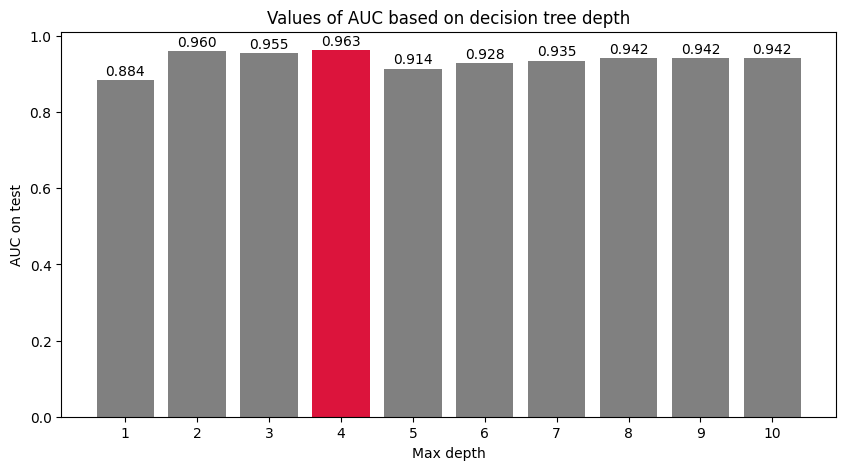

In [8]:
# Extract keys and values from the dictionary
keys = list(depth_dict.keys())
values = list(depth_dict.values())

# Create bar chart
plt.figure(figsize=(10, 5))

# Define color for each bar, set crimson for the highest value bar
colors = ['gray' if v != max(values) else 'crimson' for v in values]

bars = plt.bar(keys, values, color=colors)

# Add values on top of each bar
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, f'{value:.3f}', ha='center', va='bottom')

# Add title and labels
plt.title('Values of AUC based on decision tree depth')
plt.xlabel('Max depth')
plt.ylabel('AUC on test')

# Set x-axis ticks to show all values
plt.xticks(keys)

# Show plot
plt.show()

In [9]:
from sklearn.tree import export_graphviz
import graphviz

print(f"graphviz: {graphviz.__version__}")

graphviz: 0.20.1


In [10]:
def decision_tree_graph(model, file_to_save_name):
    # Export decision tree to DOT format
    dot_data = export_graphviz(model, out_file=None, 
                               filled=True, rounded=True,  
                               special_characters=True)

    # Visualize decision tree
    graph = graphviz.Source(dot_data)
    
    # Save tree as PNG file
    graph.render('./img/' + file_to_save_name, format='png') 
    
    # Open tree in default PDF viewer
    # graph.view()  

In [11]:
max_depth = 2
auc, model = decision_tree_calc(max_depth=max_depth)
decision_tree_graph(model, f'graph_max_depth_{str(max_depth)}')

max_depth=2; AUC: 0.96


In [12]:
max_depth = 4
auc, model = decision_tree_calc(max_depth=max_depth)
decision_tree_graph(model, f'graph_max_depth_{str(max_depth)}')

max_depth=4; AUC: 0.963


In [13]:
from sklearn.datasets import load_iris

# Load iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train decision tree classifier
iris_model = DecisionTreeClassifier(max_depth=3)
iris_model.fit(X, y)

# graph visualization
decision_tree_graph(iris_model, f'iris_dataset_max_depth_3')